In [27]:
import numpy as np

In [28]:
def calculate_iou(box1, box2):
    new_box1 = [box1[0], box1[1], box1[0] + box1[2], box1[1] + box1[3]]
    new_box2 = [box2[0], box2[1], box2[0] + box2[2], box2[1] + box2[3]]
    
    x1 = max(new_box1[0], new_box2[0])
    y1 = max(new_box1[1], new_box2[1])
    x2 = min(new_box1[2], new_box2[2])
    y2 = min(new_box1[3], new_box2[3])

    intersection_area = max(0, x2 - x1) * max(0, y2 - y1)

    box1_area = (new_box1[2] - new_box1[0]) * (new_box1[3] - new_box1[1])
    box2_area = (new_box2[2] - new_box2[0]) * (new_box2[3] - new_box2[1])

    union_area = box1_area + box2_area - intersection_area

    if union_area == 0:
        return 0  
    iou = intersection_area / union_area
    return iou
    

In [29]:
def precision_recall(labels, predictions, iou_threshold=0.5):
    matched_labels = set()
    true_positives = 0
    
    for pred in predictions:
        for i, label in enumerate(labels):
            iou = calculate_iou(pred, label)
            if iou >= iou_threshold and i not in matched_labels:
                true_positives += 1
                matched_labels.add(i)
                break

    false_positives = len(predictions) - true_positives
    false_negatives = len(labels) - len(matched_labels)
    
    precision = true_positives / (true_positives + false_positives) if predictions else 0
    recall = true_positives / (true_positives + false_negatives) if labels else 0
    
    return precision, recall
    

In [30]:
def true_positives(labels, predictions, iou_threshold=0.5):
    matched_labels = set()
    true_positives = 0
    
    for pred in predictions:
        for i, label in enumerate(labels):
            iou = calculate_iou(pred, label)
            if iou >= iou_threshold and i not in matched_labels:
                true_positives += 1
                matched_labels.add(i)
                break

    
    return true_positives
    

In [31]:
def calculate_f1(precision, recall):
    return 2 * (precision * recall) / (precision + recall) if precision + recall else 0

In [32]:
def calculate_average_precision(precisions, recalls):
    recalls = np.concatenate([[0], recalls, [1]])
    precisions = np.concatenate([[0], precisions, [0]])

    for i in range(len(precisions) - 2, -1, -1):
        precisions[i] = max(precisions[i], precisions[i + 1])

    indices = np.where(recalls[1:] != recalls[:-1])[0]
    ap = np.sum((recalls[indices + 1] - recalls[indices]) * precisions[indices + 1])
    return ap

In [33]:
step = 1000
precisions = []
recalls = []
 

labels = np.array([])
predictions = np.array([])

# for i in range(1, step):
#     confident = 100/step * i     # must start with low confident first
#     predictions_i = predictions >= confident
#     precision, recall = precision_recall(labels, predictions_i)
#     precisions.append(precision)
#     recalls.append(recall)
    
# testing
recalls = [i/1000 for i in range(1, 1000)]
precisions = [(1 - (i/1000)**2)**0.5 for i in range(1, 1000)]
ap = calculate_average_precision(precisions, recalls)
print(4* ap) # calculate pi XD

    
    
    
    

3.1395554669110277


In [34]:
id2cat = {
    "1": "person",
    "2": "bicycle",
    "3": "car",
    "4": "motorcycle",
    "5": "airplane",
    "6": "bus",
    "7": "train",
    "8": "truck",
    "9": "boat",
    "10": "traffic light",
    "11": "fire hydrant",
    "13": "stop sign",
    "14": "parking meter",
    "15": "bench",
    "16": "bird",
    "17": "cat",
    "18": "dog",
    "19": "horse",
    "20": "sheep",
    "21": "cow",
    "22": "elephant",
    "23": "bear",
    "24": "zebra",
    "25": "giraffe",
    "27": "backpack",
    "28": "umbrella",
    "31": "handbag",
    "32": "tie",
    "33": "suitcase",
    "34": "frisbee",
    "35": "skis",
    "36": "snowboard",
    "37": "sports ball",
    "38": "kite",
    "39": "baseball bat",
    "40": "baseball glove",
    "41": "skateboard",
    "42": "surfboard",
    "43": "tennis racket",
    "44": "bottle",
    "46": "wine glass",
    "47": "cup",
    "48": "fork",
    "49": "knife",
    "50": "spoon",
    "51": "bowl",
    "52": "banana",
    "53": "apple",
    "54": "sandwich",
    "55": "orange",
    "56": "broccoli",
    "57": "carrot",
    "58": "hot dog",
    "59": "pizza",
    "60": "donut",
    "61": "cake",
    "62": "chair",
    "63": "couch",
    "64": "potted plant",
    "65": "bed",
    "67": "dining table",
    "70": "toilet",
    "72": "tv",
    "73": "laptop",
    "74": "mouse",
    "75": "remote",
    "76": "keyboard",
    "77": "cell phone",
    "78": "microwave",
    "79": "oven",
    "80": "toaster",
    "81": "sink",
    "82": "refrigerator",
    "84": "book",
    "85": "clock",
    "86": "vase",
    "87": "scissors",
    "88": "teddy bear",
    "89": "hair drier",
    "90": "toothbrush"
}

In [35]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'custom', path='../yolov5/runs/train/exp9/weights/best.pt')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


print(model)


Using cache found in C:\Users\tan04/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-11-30 Python-3.11.7 torch-2.3.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [36]:
results = model('our_image/001.jpg')

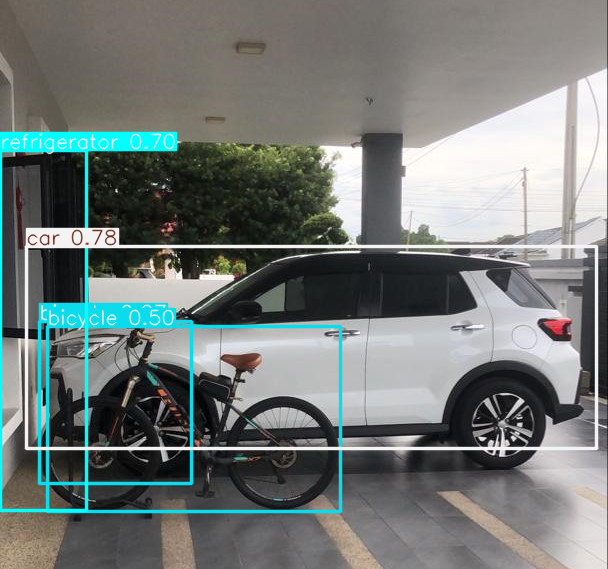

In [37]:
results.show()

In [38]:
detections = results.pandas().xyxy[0]
print(detections)
print(len(detections[detections["class"] == 1]))   

for index, row in detections[detections["class"] == 1].iterrows():
    if row['confidence'] > 0.5:
        bbox = [int(row['xmin']), int(row['ymin']), int(row['xmax'] - row['xmin']), int(row['ymax'] - row['ymin'])]
        print(bbox)


        xmin        ymin        xmax        ymax  confidence  class  \
0  26.442488  246.556717  596.120605  448.101135    0.776763      2   
1   0.046086  150.646088   86.524811  510.053925    0.700016     72   
2  47.611473  326.751068  340.044647  511.815460    0.502214      1   
3  39.019550  321.598602  191.638748  483.295959    0.266821      1   

           name  
0           car  
1  refrigerator  
2       bicycle  
3       bicycle  
2
[47, 326, 292, 185]


In [40]:
import json

with open('our_image_data.json', 'r') as infile:
    
    data = json.load(infile)
    
    
    
confident = 0.5
for i in range(100):
    if f"{i}" in id2cat.keys():
        print(f'{i}: {id2cat[f"{i}"]}')
        category = id2cat[f"{i}"]
        labels_count = 0
        true_positive_count = 0
        all_positive_count = 0
        
        for image_name in data:
            label_array_in_one_image = []
            predictions_array_in_one_image = []
            for bbox, cat_ids in zip(data[image_name]['bboxs'], data[image_name]['categories']):
                if id2cat[f"{cat_ids}"] == category:
                    labels_count += 1
                    label_array_in_one_image.append(bbox)
                    
            results = model('our_image/' + image_name)
            
            df = results.pandas().xyxy[0]
            specific_detect = df[df["name"] == category]
            specific_detect = specific_detect[specific_detect["confidence"] > confident]
            all_positive_count += len(specific_detect)
            
            for index, row in specific_detect.iterrows():
                bbox = [int(row['xmin']), int(row['ymin']), int(row['xmax'] - row['xmin']), int(row['ymax'] - row['ymin'])]
                predictions_array_in_one_image.append(bbox)
                
            true_positive_count += true_positives(label_array_in_one_image, predictions_array_in_one_image)
        
        print(f"{labels_count=}")
        print(f"{true_positive_count=}")
        print(f"{all_positive_count=}")
        print()



1: person
labels_count=63
true_positive_count=41
all_positive_count=45

2: bicycle
labels_count=8
true_positive_count=4
all_positive_count=4

3: car
labels_count=22
true_positive_count=9
all_positive_count=11

4: motorcycle
labels_count=0
true_positive_count=0
all_positive_count=0

5: airplane
labels_count=0
true_positive_count=0
all_positive_count=0

6: bus
labels_count=0
true_positive_count=0
all_positive_count=0

7: train
labels_count=1
true_positive_count=0
all_positive_count=1

8: truck
labels_count=2
true_positive_count=1
all_positive_count=1

9: boat
labels_count=4
true_positive_count=2
all_positive_count=4

10: traffic light
labels_count=2
true_positive_count=1
all_positive_count=1

11: fire hydrant
labels_count=1
true_positive_count=1
all_positive_count=1

13: stop sign
labels_count=0
true_positive_count=0
all_positive_count=0

14: parking meter
labels_count=0
true_positive_count=0
all_positive_count=1

15: bench
labels_count=2
true_positive_count=1
all_positive_count=1

16: b